- How many observations and features/columns do you have?
- What is the proportion of missing values per column?
- Which variables would you delete and why?
- What variables are most subject to outliers?
- How many qualitative and quantitative variables are there? What are appropiate visuals for quantitative vs qualitative data? What are appropiate measures for correlations when dealing with qualitative and quantitative variables?
- What is the correlation between the variables and the price? Why do you think some variables are more correlated than others?
- How are the variables themselves correlated to each other? Can you find groups of variables that are correlated together?
- How are the number of properties distributed according to their surface?
- Which five variables do you consider the most important and why?
- What are the least/most expensive municipalities in Belgium/Wallonia/Flanders? (_in terms of price per m², average price, and median price_)

### How many observations and features/columns do you have?

In [1]:
import pandas as pd

# Load your data (replace 'your_file.csv' with your actual file name)
df = pd.read_csv('ALL-province-Welde.csv')

# Show how many columns
print("Number of columns:", df.shape[1])

# Show the column names
print("Column names:")
print(df.columns.tolist())

Number of columns: 17
Column names:
['url', 'property_id', 'property_type', 'locality_name', 'postal_code', 'build_year', 'state', 'living_area', 'furnished', 'number_rooms', 'equipped_kitchen', 'terrace', 'facades', 'garden', 'garden_area', 'swimming_pool', 'price']


### What is the proportion of missing values per column?

In [3]:
import pandas as pd

# Load your data
df = pd.read_csv("ALL-province-Welde.csv")

# Number of missing values per column
missing_count = df.isna().sum().sort_values()

# Proportion of missing values per column
missing_proportion = df.isna().mean().sort_values()

print("Number of missing values per column (ascending):")
print(missing_count)

print("\nProportion of missing values per column (ascending):")
print(missing_proportion)


Number of missing values per column (ascending):
url                    0
property_id            0
garden                 0
swimming_pool          0
locality_name        218
postal_code          218
price                225
property_type        996
number_rooms        1145
terrace             1400
living_area         1502
state               3254
facades             3305
build_year          3990
furnished           4677
equipped_kitchen    7241
garden_area         7929
dtype: int64

Proportion of missing values per column (ascending):
url                 0.000000
property_id         0.000000
garden              0.000000
swimming_pool       0.000000
locality_name       0.021343
postal_code         0.021343
price               0.022029
property_type       0.097513
number_rooms        0.112101
terrace             0.137067
living_area         0.147053
state               0.318582
facades             0.323575
build_year          0.390640
furnished           0.457901
equipped_kitchen    0.70

### analysis of price column

In [9]:
import pandas as pd

# Load your data
df = pd.read_csv("ALL-province-Welde-clean-numeric.csv")

# Convert price column to string (in case it contains numbers)
df["price"] = df["price"].astype(str)

# Show unique price formats
unique_formats = df["price"].unique()

# Show number of each price format
format_counts = df["price"].value_counts()

print("Unique price formats:")
print(unique_formats)

print("\nCount of each price format:")
print(format_counts)


Unique price formats:
['580\u202f000 €' 'Make offer from 695\u202f000 €' '249\u202f000 €' ...
 '448\u202f096 €' '954\u202f500 €' '386\u202f690 €']

Count of each price format:
price
299 000 €                    183
295 000 €                    123
249 000 €                    118
275 000 €                    118
349 000 €                    116
                            ... 
497 200 €                      1
Make offer from 402 754 €      1
1 085 000 €                    1
343 000 €                      1
99 500 €                       1
Name: count, Length: 1514, dtype: int64


### data minus range prices and nan values

In [6]:
import pandas as pd

# Load your data
df = pd.read_csv("ALL-province-Welde.csv")

# Convert price column to string (NaN becomes 'nan')
df["price_str"] = df["price"].astype(str)

# Keep only rows where price is not NaN and does NOT contain a dash '-'
df_clean = df[
    df["price"].notna() & ~df["price_str"].str.contains("-", na=False)
]

# Save the cleaned data to a new CSV
df_clean.to_csv("ALL-province-Welde-range&nan.csv", index=False)

print("Cleaned data saved. Number of rows:", len(df_clean))



Cleaned data saved. Number of rows: 9330


### cleaned welde file

In [8]:
import pandas as pd

# Load your already partially cleaned numeric file
df = pd.read_csv("ALL-province-Welde-range&nan.csv")

# Convert price column to string for safe operations
df["price_str"] = df["price"].astype(str)

# Remove 'Make offer from ' text
df["price_clean"] = df["price_str"].str.replace("Make offer from ", "", regex=False)

# Remove euro symbols, spaces, commas, and non-breaking spaces
df["price_clean"] = (
    df["price_clean"]
    .str.replace("€", "", regex=False)
    .str.replace("\u202f", "", regex=False)  # non-breaking space
    .str.replace(",", "", regex=False)
    .str.strip()
)

# Convert to numeric
df["price_num"] = pd.to_numeric(df["price_clean"], errors="coerce")

# Remove rows that could not be converted
df_clean = df[df["price_num"].notna()]

# Save the fully cleaned numeric file
df_clean.to_csv("ALL-province-Welde-clean-numeric.csv", index=False)

print("Cleaning done. Example of cleaned prices:")
print(df_clean[["price", "price_num"]].head())


Cleaning done. Example of cleaned prices:
                       price  price_num
0                  580 000 €   580000.0
1  Make offer from 695 000 €   695000.0
2                  249 000 €   249000.0
3                  499 000 €   499000.0
4                  650 000 €   650000.0


### double cleaning

In [11]:
import pandas as pd

# Load the file
df = pd.read_csv("ALL-province-Welde-clean-numeric.csv")

# Convert price column to string
df["price_str"] = df["price"].astype(str)

# Remove non-breaking spaces and extra spaces
df["price_str"] = df["price_str"].str.replace("\u202f", "", regex=False).str.strip()

# Remove 'make offer from' (case-insensitive)
df["price_clean"] = df["price_str"].str.replace(
    "make offer from ", "", regex=False, case=False
)

# Remove euro symbol and commas
df["price_clean"] = (
    df["price_clean"]
    .str.replace("€", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)

# Convert to numeric
df["price_num"] = pd.to_numeric(df["price_clean"], errors="coerce")

# Drop rows that could not be converted
df_clean = df[df["price_num"].notna()]

# Save cleaned numeric file
df_clean.to_csv("ALL-province-Welde-clean-numeric.csv", index=False)

print("Cleaning done. Example of cleaned prices:")
print(df_clean[["price", "price_num"]].head())


Cleaning done. Example of cleaned prices:
                       price  price_num
0                  580 000 €     580000
1  Make offer from 695 000 €     695000
2                  249 000 €     249000
3                  499 000 €     499000
4                  650 000 €     650000


### intan file-attempt to have afilterd file with 3 provines

In [12]:
import pandas as pd

# Load the CSV
df = pd.read_csv("properties_data_final-intan.csv")

# Make sure postal_code is numeric
df["postal_code"] = pd.to_numeric(df["postal_code"], errors="coerce")

# Define a function to assign provinces based on postal code
def assign_province(postal_code):
    if 1300 <= postal_code <= 1499:
        return "Walloon Brabant (Brabant Wallon)"
    elif 1500 <= postal_code <= 1999 or 3000 <= postal_code <= 3499:
        return "Flemish Brabant (Vlaams-Brabant)"
    elif 5000 <= postal_code <= 5999:
        return "Namur"
    else:
        return None  # not in the specified provinces

# Apply the function to create a new column
df["province"] = df["postal_code"].apply(assign_province)

# Filter rows that belong to one of the three provinces
df_provinces = df[df["province"].notna()]

# Save to a new CSV
df_provinces.to_csv("my_provinces.csv", index=False)

print("Filtered data saved. Number of rows:", len(df_provinces))


Filtered data saved. Number of rows: 3793


### addition of provinces

In [13]:
import pandas as pd

# Load the CSV
df = pd.read_csv("properties_data_final-intan.csv")

# Ensure postal_code is numeric
df["postal_code"] = pd.to_numeric(df["postal_code"], errors="coerce")

# Function to assign province based on postal code
def assign_province(pc):
    if pd.isna(pc):
        return None
    pc = int(pc)
    # Check Brussels Capital Region
    if 1000 <= pc <= 1299:
        return "Brussels Capital Region"
    # Walloon Brabant
    elif 1300 <= pc <= 1499:
        return "Walloon Brabant"
    # Flemish Brabant
    elif (1500 <= pc <= 1999) or (3000 <= pc <= 3499):
        return "Flemish Brabant"
    # Antwerp
    elif 2000 <= pc <= 2990:
        return "Antwerp"
    # Liège
    elif 4000 <= pc <= 4999:
        return "Liège"
    # Namur
    elif 5000 <= pc <= 5999:
        return "Namur"
    # Hainaut
    elif (6000 <= pc <= 6599) or (7000 <= pc <= 7999):
        return "Hainaut"
    # West Flanders
    elif 8000 <= pc <= 8999:
        return "West Flanders"
    # East Flanders
    elif 9000 <= pc <= 9999:
        return "East Flanders"
    # Limburg
    elif 3500 <= pc <= 3990:
        return "Limburg"
    # Luxembourg (approximate, considering overlap)
    elif (6000 <= pc <= 6599) or (6600 <= pc <= 6999) or (5000 <= pc <= 5699):
        return "Luxembourg"
    else:
        return None  # postal code not in listed ranges

# Apply function to create new column
df["province"] = df["postal_code"].apply(assign_province)

# Save to a new CSV
df.to_csv("properties_data_with_provinces.csv", index=False)

print("Province assignment done. Example:")
print(df[["postal_code", "province"]].head())


Province assignment done. Example:
   postal_code         province
0       1853.0  Flemish Brabant
1       1341.0  Walloon Brabant
2       1300.0  Walloon Brabant
3       1853.0  Flemish Brabant
4       1341.0  Walloon Brabant


### cleaning coniidering property_id

In [17]:
import pandas as pd

# Load the CSV
df = pd.read_csv("properties_data_with_provinces.csv")  # or your file name

# Get unique states
unique_states = df["state"].unique()

# Number of unique states
num_unique = len(unique_states)

print("Number of unique states:", num_unique)
print("\nList of unique states:")
print(unique_states)



Number of unique states: 11

List of unique states:
['Excellent' 'To be renovated' 'Normal' 'To renovate' 'Fully renovated'
 nan 'New' 'To demolish' 'Under construction' 'To restore' 'state']


### cleaning property types categorized

In [16]:
import pandas as pd

# Load the CSV
df = pd.read_csv("properties_data_with_provinces.csv")

# Define mapping lists
apartment_list = ['Apartment', 'Studio', 'Triplex', 'Duplex', 'Ground', 'Loft', 'Penthouse']
house_list = ['Residence', 'Bungalow', 'Master']
exceptional_list = ['Villa', 'Chalet', 'Cottage', 'Mixed', 'Mansion', 'Development', 
                    'Commercial', 'Business', 'Land', 'Garage', 'Office', 'Student']

# Function to assign the new property_type_name
def map_property_type(pt):
    if pd.isna(pt):
        return pd.NA
    pt = str(pt).strip()  # remove leading/trailing spaces
    if pt in apartment_list:
        return 'apartment'
    elif pt in house_list:
        return 'house'
    elif pt in exceptional_list:
        return 'exceptional'
    else:
        return pd.NA  # anything else or unexpected values

# Apply the mapping function
df['property_type_name'] = df['property_type'].apply(map_property_type)

# Save to a new CSV
df.to_csv("properties_data_with_provinces_mapped.csv", index=False)

print("Mapping done. Example:")
print(df[['property_type', 'property_type_name']].head())


Mapping done. Example:
  property_type property_type_name
0     Residence              house
1     Residence              house
2     Apartment          apartment
3     Residence              house
4     Residence              house


### state remapped 

In [18]:
import pandas as pd

# Load the CSV
df = pd.read_csv("properties_data_with_provinces_mapped.csv")  # adjust filename if needed

# Define mapping lists
ready_to_move_in_list = ['Excellent', 'Normal', 'Fully renovated', 'New']
to_renovate_list = ['To be renovated', 'To renovate', 'To demolish', 'Under construction', 'To restore']

# Function to map state
def map_state(s):
    if pd.isna(s) or s.strip().lower() == 'state':  # handle missing or literal 'state'
        return pd.NA
    s_clean = s.strip()  # remove extra spaces
    if s_clean in ready_to_move_in_list:
        return 'ready_to_move_in'
    elif s_clean in to_renovate_list:
        return 'to_renovate'
    else:
        return pd.NA  # anything else

# Apply mapping function
df['state_mapped'] = df['state'].apply(map_state)

# Save to a new CSV
df.to_csv("properties_data_with_provinces_state_mapped.csv", index=False)

print("State mapping done. Example:")
print(df[['state', 'state_mapped']].head())


State mapping done. Example:
             state      state_mapped
0        Excellent  ready_to_move_in
1        Excellent  ready_to_move_in
2  To be renovated       to_renovate
3           Normal  ready_to_move_in
4        Excellent  ready_to_move_in


### price correction

In [19]:
import pandas as pd

# Load both CSV files
df_clean = pd.read_csv("properties_data_with_provinces_state_mapped.csv")
df_original = pd.read_csv("properties_data_final-intan.csv")

# Keep only property_id and price from the original file to avoid unnecessary merge columns
df_original_price = df_original[["property_id", "price"]].copy()
df_original_price.rename(columns={"price": "correct_price"}, inplace=True)

# Merge the correct prices into the cleaned file
df_merged = df_clean.merge(df_original_price, on="property_id", how="left")

# Replace the cleaned price with the correct original price
df_merged["price"] = df_merged["correct_price"]

# Drop the helper column
df_merged.drop(columns=["correct_price"], inplace=True)

# Save to a new CSV
df_merged.to_csv("Hamideh_prices.csv", index=False)

print("Price correction completed. Saved as Hamideh_prices.csv")
print(df_merged[["property_id", "price"]].head())


Price correction completed. Saved as Hamideh_prices.csv
  property_id     price
0    vba56897  580000.0
1    vbd16452  695000.0
2    vbd12380  249000.0
3    vbd39990  499000.0
4    vbd24791  650000.0


In [20]:
import pandas as pd

# Load your file
df = pd.read_csv("Hamideh_prices.csv")

# Convert price to numeric (in case it is still stored as string)
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# Remove the extra zero by dividing by 10
df["price"] = df["price"] / 10

# Save the corrected file
df.to_csv("Hamideh_prices_fixed.csv", index=False)

print("Extra zero removed. Saved as Hamideh_prices_fixed.csv")
print(df[["property_id", "price"]].head())


Extra zero removed. Saved as Hamideh_prices_fixed.csv
  property_id    price
0    vba56897  58000.0
1    vbd16452  69500.0
2    vbd12380  24900.0
3    vbd39990  49900.0
4    vbd24791  65000.0


### facades correction

In [21]:
import pandas as pd

# Load file
df = pd.read_csv("Hamideh_prices_fixed.csv")

# Convert facades to numeric (non-convertible -> NaN)
df["facades_num"] = pd.to_numeric(df["facades"], errors="coerce")

# Find rows that currently have the erroneous values 20, 30, or 40
mask = df["facades_num"].isin([20, 30, 40])

# Correct those rows by dividing by 10
df.loc[mask, "facades_num"] = df.loc[mask, "facades_num"] / 10

# Replace the original column with the corrected numeric values.
# Use pandas nullable integer dtype so missing values are preserved.
df["facades"] = df["facades_num"].round().astype("Int64")

# Drop the helper column
df.drop(columns=["facades_num"], inplace=True)

# Save corrected file
df.to_csv("Hamideh_prices_fixed_facades_corrected.csv", index=False)

print("Fixed facades and saved to Hamideh_prices_fixed_facades_corrected.csv")
print(df[["property_id", "facades"]].head())


Fixed facades and saved to Hamideh_prices_fixed_facades_corrected.csv
  property_id  facades
0    vba56897        2
1    vbd16452        4
2    vbd12380        4
3    vbd39990        3
4    vbd24791        4


### empty prices removed!

In [22]:
import pandas as pd

# Load the file
df = pd.read_csv("Hamideh_prices_fixed_facades_corrected.csv")

# Remove rows where price is missing (NaN)
df_clean = df[df["price"].notna()].copy()

# Save the cleaned file
df_clean.to_csv("Hamideh_prices_clean.csv", index=False)

print("Rows without price removed. Saved as Hamideh_prices_clean.csv")
print(df_clean.head())


Rows without price removed. Saved as Hamideh_prices_clean.csv
  build_year  facades garden living_area    locality_name number_rooms  \
0       1996      2.0      1         270  Strombeek-Bever            4   
1       1991      4.0      1         218    Céroux-Mousty            5   
2       1970      4.0      0         135            Limal            3   
3       1959      3.0      1         176  Strombeek-Bever            3   
4       2007      4.0      1         200    Céroux-Mousty            4   

   postal_code    price property_id property_type  \
0       1853.0  58000.0    vba56897     Residence   
1       1341.0  69500.0    vbd16452     Residence   
2       1300.0  24900.0    vbd12380     Apartment   
3       1853.0  49900.0    vbd39990     Residence   
4       1341.0  65000.0    vbd24791     Residence   

                                        property_url            state  \
0  https://immovlan.be/en/detail/residence/for-sa...        Excellent   
1  https://immovlan.be/en/de

### visualization of to revovate and ready to move in

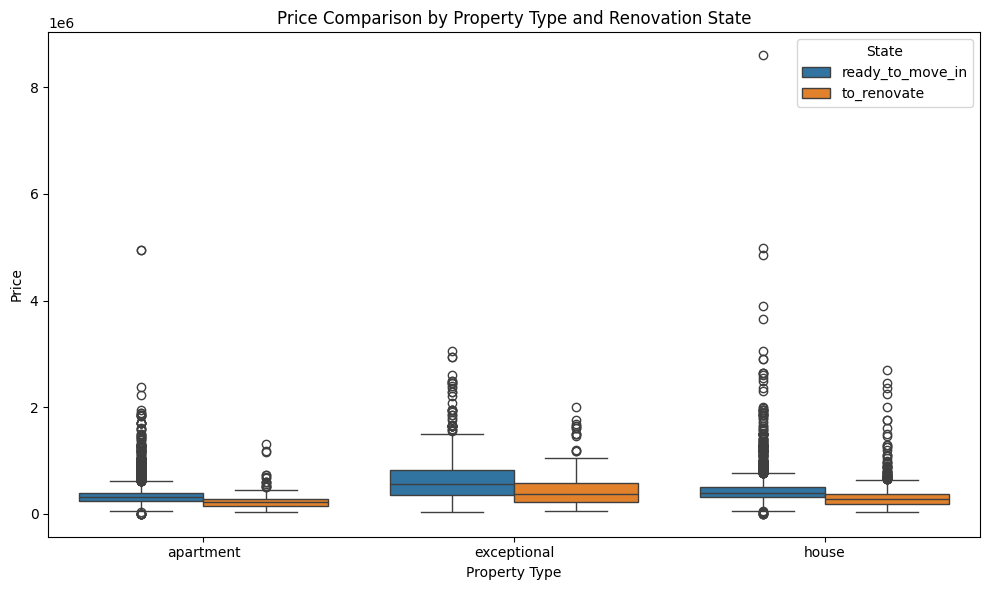

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Optional: ensure categorical ordering
df['state_mapped'] = df['state_mapped'].astype('category')
df['property_type_name'] = df['property_type_name'].astype('category')

# Plot: price vs. property type, separated by state_mapped
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="property_type_name",
    y="price",
    hue="state_mapped"
)

plt.title("Price Comparison by Property Type and Renovation State")
plt.xlabel("Property Type")
plt.ylabel("Price")
plt.legend(title="State")
plt.tight_layout()
plt.show()




### price difference in three categories in percentage

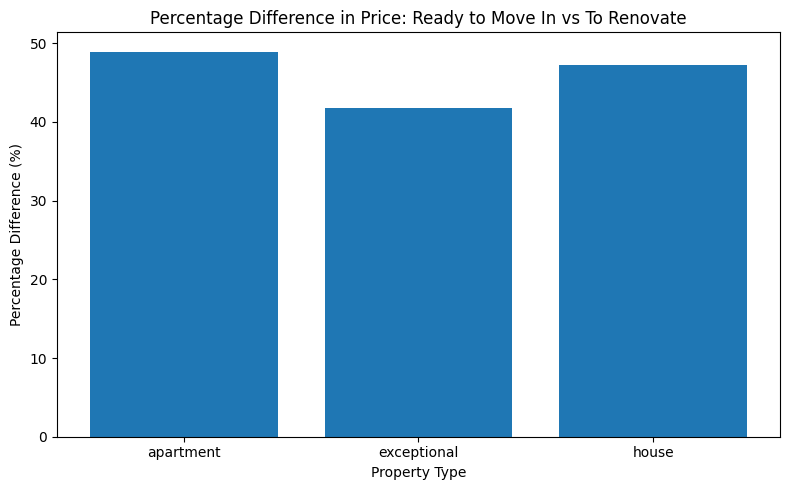

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Compute mean prices for each category
grouped = (
    df.groupby(['property_type_name', 'state_mapped'])['price']
      .mean()
      .unstack()
)

# Calculate percentage difference for each property type
grouped['percent_difference'] = (
    (grouped['ready_to_move_in'] - grouped['to_renovate']) 
    / grouped['to_renovate'] * 100
)

# Prepare data for plotting
percent_df = grouped['percent_difference'].reset_index()

# Plot
plt.figure(figsize=(8,5))
plt.bar(percent_df['property_type_name'], percent_df['percent_difference'])

plt.title("Percentage Difference in Price: Ready to Move In vs To Renovate")
plt.xlabel("Property Type")
plt.ylabel("Percentage Difference (%)")
plt.tight_layout()
plt.show()


### difference based on the mean :-)

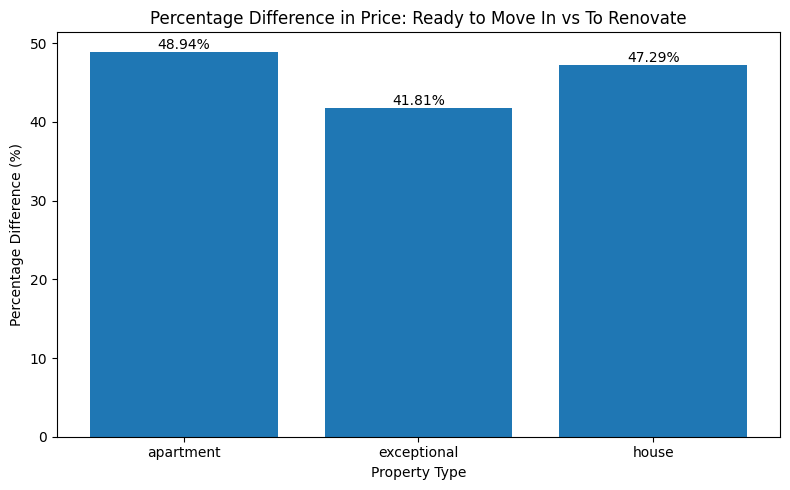

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Compute mean prices for each category
grouped = (
    df.groupby(['property_type_name', 'state_mapped'])['price']
      .mean()
      .unstack()
)

# Calculate percentage difference for each property type
grouped['percent_difference'] = (
    (grouped['ready_to_move_in'] - grouped['to_renovate']) 
    / grouped['to_renovate'] * 100
)

# Prepare data for plotting
percent_df = grouped['percent_difference'].reset_index()

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(percent_df['property_type_name'], percent_df['percent_difference'])

# Add percentage labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}%",
        ha='center',
        va='bottom'
    )

plt.title("Percentage Difference in Price: Ready to Move In vs To Renovate")
plt.xlabel("Property Type")
plt.ylabel("Percentage Difference (%)")
plt.tight_layout()
plt.show()


### difference based on the mean and median :-)

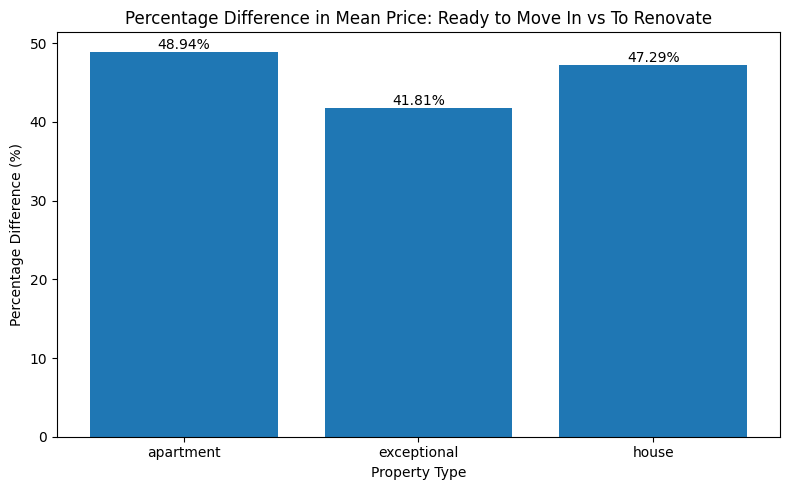

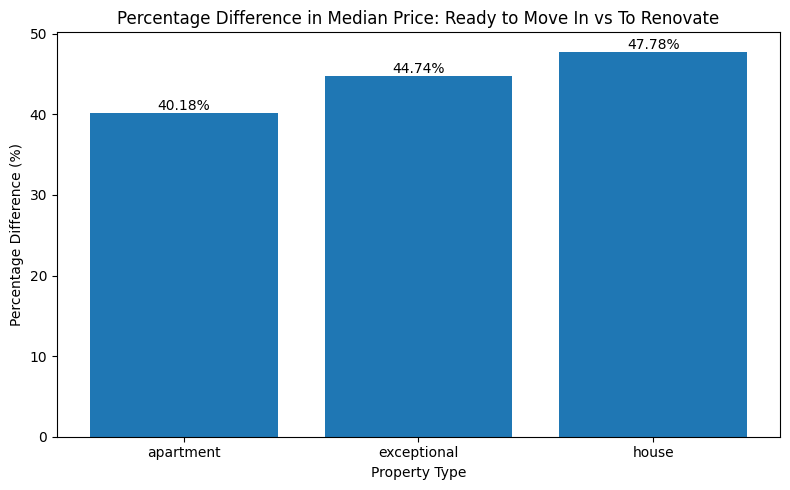

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# ---------- MEAN ----------
grouped_mean = (
    df.groupby(['property_type_name', 'state_mapped'])['price']
      .mean()
      .unstack()
)

grouped_mean['percent_difference'] = (
    (grouped_mean['ready_to_move_in'] - grouped_mean['to_renovate']) /
    grouped_mean['to_renovate'] * 100
)

percent_mean_df = grouped_mean['percent_difference'].reset_index()

# ---------- MEDIAN ----------
grouped_median = (
    df.groupby(['property_type_name', 'state_mapped'])['price']
      .median()
      .unstack()
)

grouped_median['percent_difference'] = (
    (grouped_median['ready_to_move_in'] - grouped_median['to_renovate']) /
    grouped_median['to_renovate'] * 100
)

percent_median_df = grouped_median['percent_difference'].reset_index()

# ---------- PLOT MEAN ----------
plt.figure(figsize=(8,5))
bars = plt.bar(percent_mean_df['property_type_name'], percent_mean_df['percent_difference'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}%", 
             ha='center', va='bottom')

plt.title("Percentage Difference in Mean Price: Ready to Move In vs To Renovate")
plt.xlabel("Property Type")
plt.ylabel("Percentage Difference (%)")
plt.tight_layout()
plt.show()

# ---------- PLOT MEDIAN ----------
plt.figure(figsize=(8,5))
bars = plt.bar(percent_median_df['property_type_name'], percent_median_df['percent_difference'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}%", 
             ha='center', va='bottom')

plt.title("Percentage Difference in Median Price: Ready to Move In vs To Renovate")
plt.xlabel("Property Type")
plt.ylabel("Percentage Difference (%)")
plt.tight_layout()
plt.show()


### difference based on the mean and median minus outliers :-)

C:\Users\HamidehBaggali\AppData\Local\Temp\ipykernel_21152\333270392.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(remove_outliers)


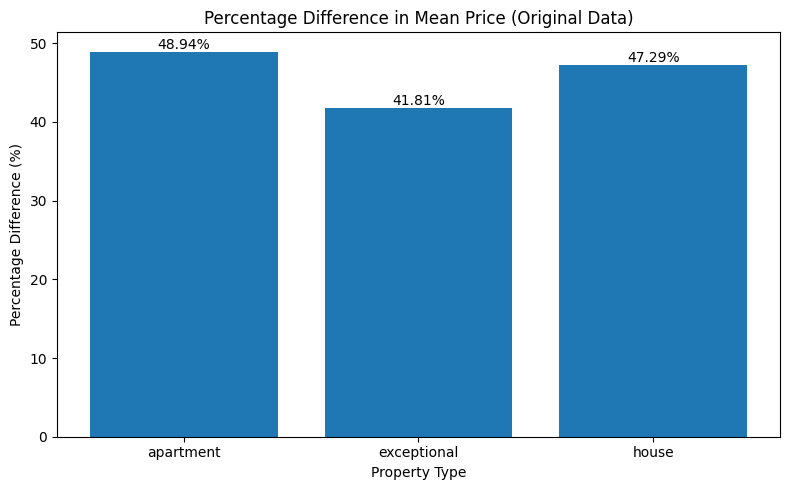

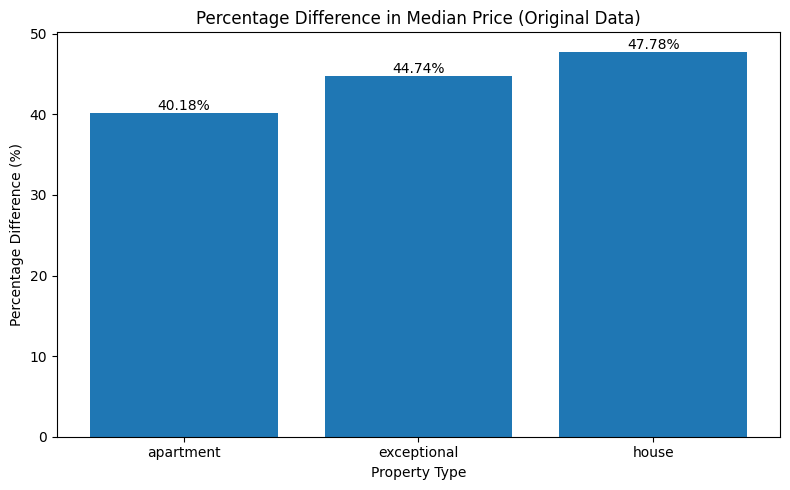

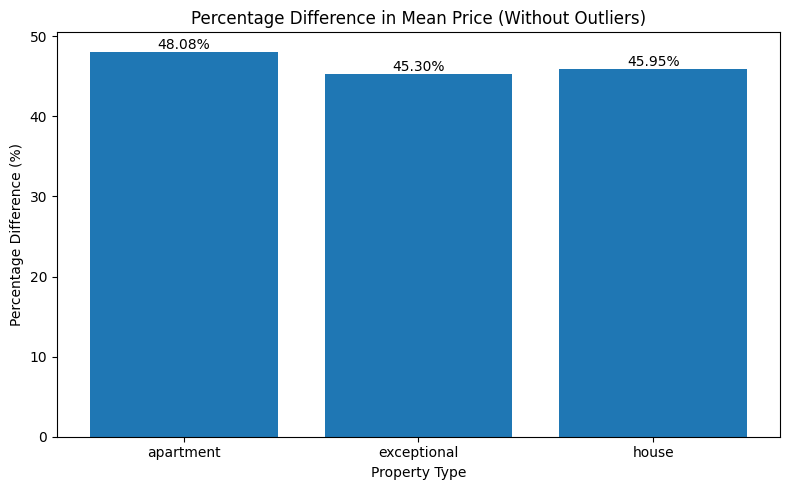

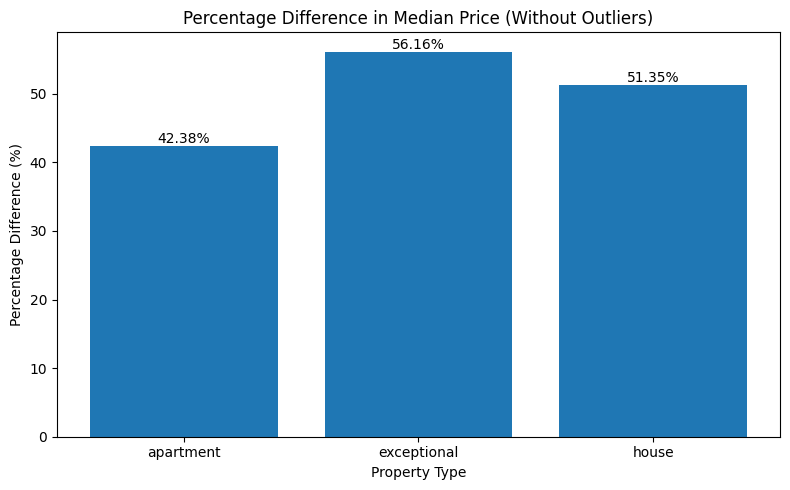

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# ------------------------------------------
# FUNCTION: remove outliers using IQR method
# ------------------------------------------
def remove_outliers(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['price'] >= lower) & (group['price'] <= upper)]

# Apply outlier removal per category
df_no_outliers = df.groupby(
    ['property_type_name', 'state_mapped'],
    group_keys=False
).apply(remove_outliers)


# ============================================================
# 1) MEAN (original data)
# ============================================================
grouped_mean = (
    df.groupby(['property_type_name', 'state_mapped'])['price']
      .mean()
      .unstack()
)

grouped_mean['percent_difference'] = (
    (grouped_mean['ready_to_move_in'] - grouped_mean['to_renovate'])
    / grouped_mean['to_renovate'] * 100
)

percent_mean_df = grouped_mean['percent_difference'].reset_index()

# PLOT 1 — Mean (original)
plt.figure(figsize=(8,5))
bars = plt.bar(percent_mean_df['property_type_name'], percent_mean_df['percent_difference'])
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{h:.2f}%", ha='center', va='bottom')
plt.title("Percentage Difference in Mean Price (Original Data)")
plt.xlabel("Property Type")
plt.ylabel("Percentage Difference (%)")
plt.tight_layout()
plt.show()


# ============================================================
# 2) MEDIAN (original data)
# ============================================================
grouped_median = (
    df.groupby(['property_type_name', 'state_mapped'])['price']
      .median()
      .unstack()
)

grouped_median['percent_difference'] = (
    (grouped_median['ready_to_move_in'] - grouped_median['to_renovate'])
    / grouped_median['to_renovate'] * 100
)

percent_median_df = grouped_median['percent_difference'].reset_index()

# PLOT 2 — Median (original)
plt.figure(figsize=(8,5))
bars = plt.bar(percent_median_df['property_type_name'], percent_median_df['percent_difference'])
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{h:.2f}%", ha='center', va='bottom')
plt.title("Percentage Difference in Median Price (Original Data)")
plt.xlabel("Property Type")
plt.ylabel("Percentage Difference (%)")
plt.tight_layout()
plt.show()


# ============================================================
# 3) MEAN (after removing outliers)
# ============================================================
grouped_mean_no = (
    df_no_outliers.groupby(['property_type_name', 'state_mapped'])['price']
      .mean()
      .unstack()
)

grouped_mean_no['percent_difference'] = (
    (grouped_mean_no['ready_to_move_in'] - grouped_mean_no['to_renovate'])
    / grouped_mean_no['to_renovate'] * 100
)

percent_mean_no_df = grouped_mean_no['percent_difference'].reset_index()

# PLOT 3 — Mean after removing outliers
plt.figure(figsize=(8,5))
bars = plt.bar(percent_mean_no_df['property_type_name'], percent_mean_no_df['percent_difference'])
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{h:.2f}%", ha='center', va='bottom')
plt.title("Percentage Difference in Mean Price (Without Outliers)")
plt.xlabel("Property Type")
plt.ylabel("Percentage Difference (%)")
plt.tight_layout()
plt.show()


# ============================================================
# 4) MEDIAN (after removing outliers)
# ============================================================
grouped_median_no = (
    df_no_outliers.groupby(['property_type_name', 'state_mapped'])['price']
      .median()
      .unstack()
)

grouped_median_no['percent_difference'] = (
    (grouped_median_no['ready_to_move_in'] - grouped_median_no['to_renovate'])
    / grouped_median_no['to_renovate'] * 100
)

percent_median_no_df = grouped_median_no['percent_difference'].reset_index()

# PLOT 4 — Median after removing outliers
plt.figure(figsize=(8,5))
bars = plt.bar(percent_median_no_df['property_type_name'], percent_median_no_df['percent_difference'])
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2, h, f"{h:.2f}%", ha='center', va='bottom')
plt.title("Percentage Difference in Median Price (Without Outliers)")
plt.xlabel("Property Type")
plt.ylabel("Percentage Difference (%)")
plt.tight_layout()
plt.show()


### together

C:\Users\HamidehBaggali\AppData\Local\Temp\ipykernel_21152\825834363.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(remove_outliers)


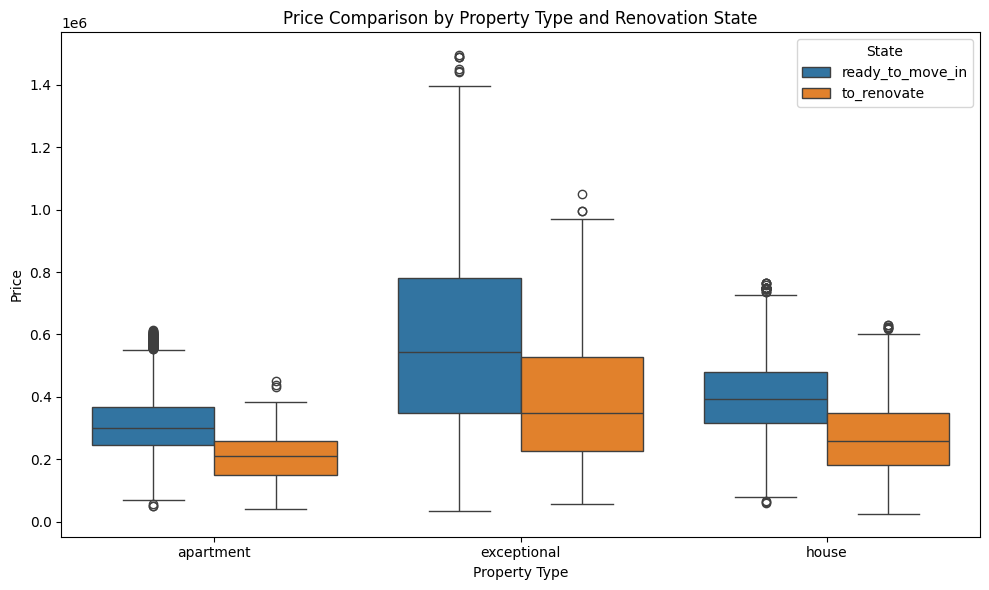

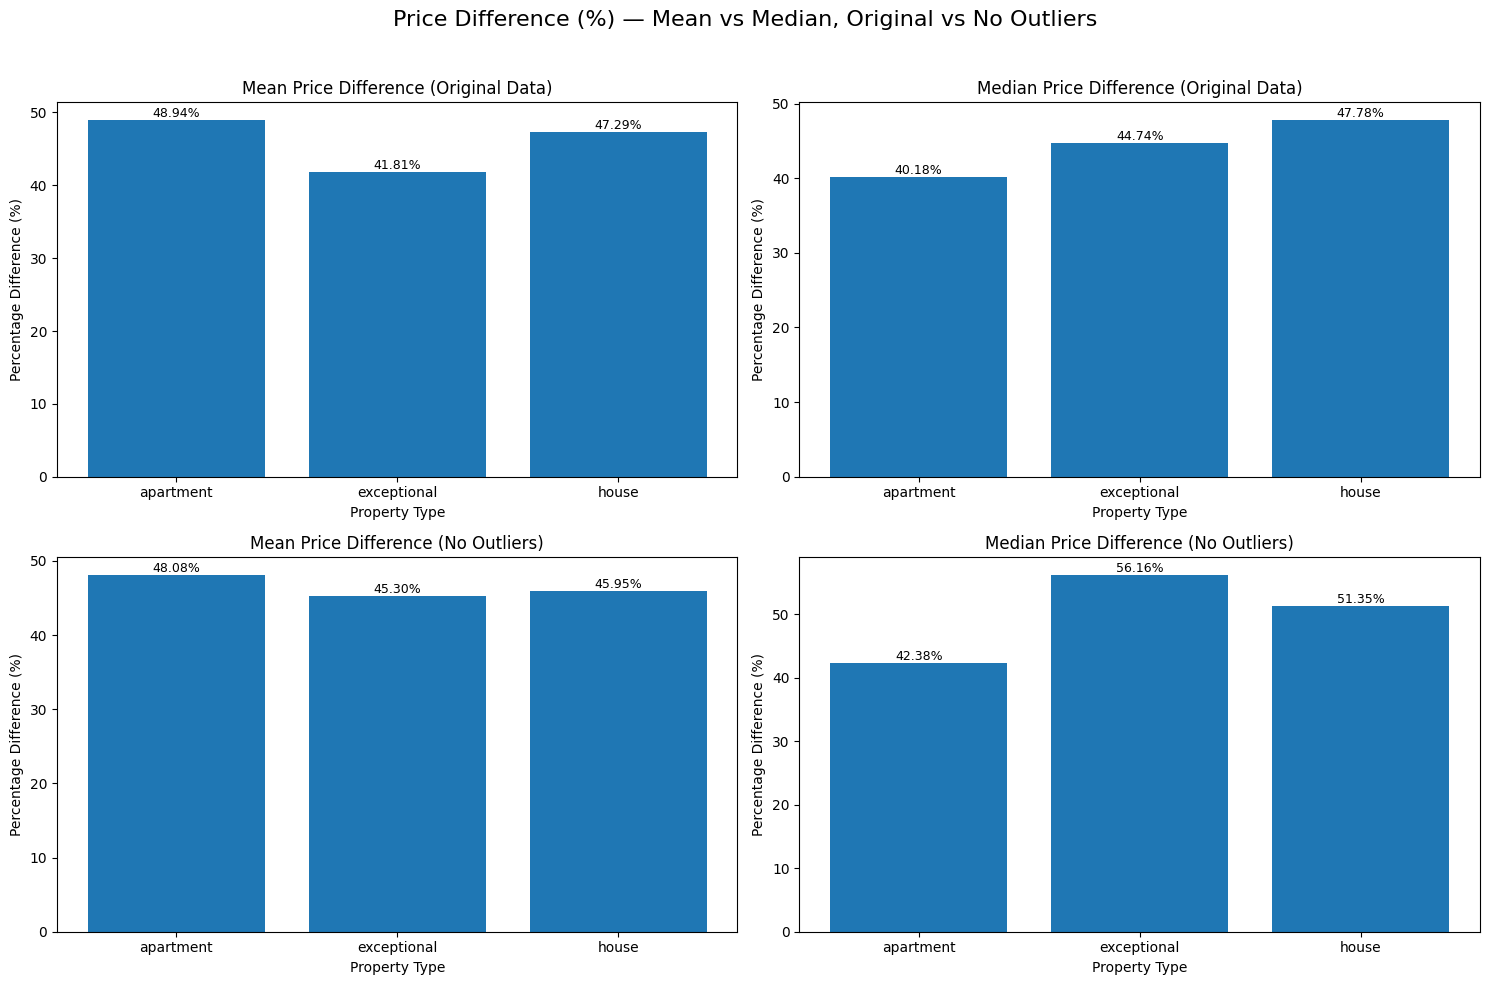

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# ------------------------------------------
# FUNCTION: remove outliers using IQR method
# ------------------------------------------
def remove_outliers(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['price'] >= lower) & (group['price'] <= upper)]

# Apply per group
df_no_outliers = df.groupby(
    ['property_type_name', 'state_mapped'],
    group_keys=False
).apply(remove_outliers)

# Box plot without outliers
# Plot: price vs. property type, separated by state_mapped
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_no_outliers,
    x="property_type_name",
    y="price",
    hue="state_mapped"
)

plt.title("Price Comparison by Property Type and Renovation State")
plt.xlabel("Property Type")
plt.ylabel("Price")
plt.legend(title="State")
plt.tight_layout()
plt.show()

# ---------- ORIGINAL MEAN ----------
grouped_mean = (
    df.groupby(['property_type_name', 'state_mapped'])['price']
      .mean()
      .unstack()
)
grouped_mean['percent_difference'] = (
    (grouped_mean['ready_to_move_in'] - grouped_mean['to_renovate'])
    / grouped_mean['to_renovate'] * 100
)
percent_mean_df = grouped_mean['percent_difference'].reset_index()

# ---------- ORIGINAL MEDIAN ----------
grouped_median = (
    df.groupby(['property_type_name', 'state_mapped'])['price']
      .median()
      .unstack()
)
grouped_median['percent_difference'] = (
    (grouped_median['ready_to_move_in'] - grouped_median['to_renovate'])
    / grouped_median['to_renovate'] * 100
)
percent_median_df = grouped_median['percent_difference'].reset_index()

# ---------- MEAN WITHOUT OUTLIERS ----------
grouped_mean_no = (
    df_no_outliers.groupby(['property_type_name', 'state_mapped'])['price']
      .mean()
      .unstack()
)
grouped_mean_no['percent_difference'] = (
    (grouped_mean_no['ready_to_move_in'] - grouped_mean_no['to_renovate'])
    / grouped_mean_no['to_renovate'] * 100
)
percent_mean_no_df = grouped_mean_no['percent_difference'].reset_index()

# ---------- MEDIAN WITHOUT OUTLIERS ----------
grouped_median_no = (
    df_no_outliers.groupby(['property_type_name', 'state_mapped'])['price']
      .median()
      .unstack()
)
grouped_median_no['percent_difference'] = (
    (grouped_median_no['ready_to_move_in'] - grouped_median_no['to_renovate'])
    / grouped_median_no['to_renovate'] * 100
)
percent_median_no_df = grouped_median_no['percent_difference'].reset_index()


# ============================================================
# ------------- COMBINED 4-PANEL VISUALIZATION ---------------
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Price Difference (%) — Mean vs Median, Original vs No Outliers", fontsize=16)

# Helper function for bar plot with labels
def plot_bar(ax, df, title):
    bars = ax.bar(df['property_type_name'], df['percent_difference'])
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h, f"{h:.2f}%", 
                ha='center', va='bottom', fontsize=9)
    ax.set_title(title)
    ax.set_xlabel("Property Type")
    ax.set_ylabel("Percentage Difference (%)")

# Fill each subplot
plot_bar(axes[0, 0], percent_mean_df, "Mean Price Difference (Original Data)")
plot_bar(axes[0, 1], percent_median_df, "Median Price Difference (Original Data)")
plot_bar(axes[1, 0], percent_mean_no_df, "Mean Price Difference (No Outliers)")
plot_bar(axes[1, 1], percent_median_no_df, "Median Price Difference (No Outliers)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\HamidehBaggali\AppData\Local\Temp\ipykernel_21152\1368122310.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(remove_outliers)


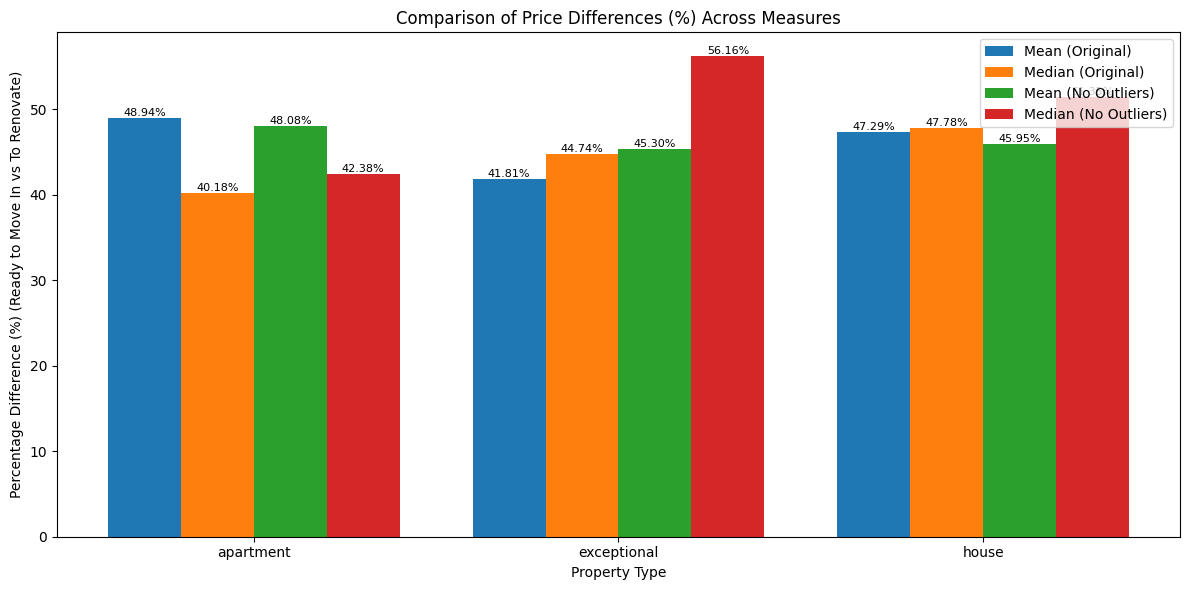

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# ------------------------------------------
# FUNCTION: remove outliers using IQR method
# ------------------------------------------
def remove_outliers(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['price'] >= lower) & (group['price'] <= upper)]

df_no_outliers = df.groupby(
    ['property_type_name', 'state_mapped'],
    group_keys=False
).apply(remove_outliers)

# ------------------------------
# 1) MEAN (original)
# ------------------------------
grouped_mean = df.groupby(['property_type_name','state_mapped'])['price'].mean().unstack()
grouped_mean['mean_original'] = (
    (grouped_mean['ready_to_move_in'] - grouped_mean['to_renovate']) /
    grouped_mean['to_renovate'] * 100
)

# ------------------------------
# 2) MEDIAN (original)
# ------------------------------
grouped_median = df.groupby(['property_type_name','state_mapped'])['price'].median().unstack()
grouped_median['median_original'] = (
    (grouped_median['ready_to_move_in'] - grouped_median['to_renovate']) /
    grouped_median['to_renovate'] * 100
)

# ------------------------------
# 3) MEAN (no outliers)
# ------------------------------
grouped_mean_no = df_no_outliers.groupby(['property_type_name','state_mapped'])['price'].mean().unstack()
grouped_mean_no['mean_no_outliers'] = (
    (grouped_mean_no['ready_to_move_in'] - grouped_mean_no['to_renovate']) /
    grouped_mean_no['to_renovate'] * 100
)

# ------------------------------
# 4) MEDIAN (no outliers)
# ------------------------------
grouped_median_no = df_no_outliers.groupby(['property_type_name','state_mapped'])['price'].median().unstack()
grouped_median_no['median_no_outliers'] = (
    (grouped_median_no['ready_to_move_in'] - grouped_median_no['to_renovate']) /
    grouped_median_no['to_renovate'] * 100
)

# --------------------------------------------------
# Combine the four results into one dataframe
# --------------------------------------------------
combined = pd.DataFrame({
    'property_type_name': grouped_mean.index,
    'Mean (Original)': grouped_mean['mean_original'],
    'Median (Original)': grouped_median['median_original'],
    'Mean (No Outliers)': grouped_mean_no['mean_no_outliers'],
    'Median (No Outliers)': grouped_median_no['median_no_outliers']
})

# --------------------------------------------------
# Plot: grouped bar chart
# --------------------------------------------------
labels = combined['property_type_name']
x = np.arange(len(labels))
width = 0.2  # bar width

fig, ax = plt.subplots(figsize=(12, 6))

bars1 = ax.bar(x - 1.5*width, combined['Mean (Original)'], width, label='Mean (Original)')
bars2 = ax.bar(x - 0.5*width, combined['Median (Original)'], width, label='Median (Original)')
bars3 = ax.bar(x + 0.5*width, combined['Mean (No Outliers)'], width, label='Mean (No Outliers)')
bars4 = ax.bar(x + 1.5*width, combined['Median (No Outliers)'], width, label='Median (No Outliers)')

# Add labels on top of bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h, f"{h:.2f}%", 
                ha='center', va='bottom', fontsize=8)

ax.set_title("Comparison of Price Differences (%) Across Measures")
ax.set_xlabel("Property Type")
ax.set_ylabel("Percentage Difference (%) (Ready to Move In vs To Renovate)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


### which outliers?

In [18]:
import pandas as pd

# Load data
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Function to count outliers per group
def count_outliers(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Boolean mask of outliers
    outlier_mask = (group['price'] < lower) | (group['price'] > upper)
    
    # Count removed
    removed_count = outlier_mask.sum()
    total = len(group)
    
    return pd.Series({
        'total_rows': total,
        'outliers_removed': removed_count,
        'percentage_removed': (removed_count / total) * 100
    })

# Apply the function to each group
outlier_summary = (
    df.groupby(['property_type_name', 'state_mapped'])
      .apply(count_outliers)
      .reset_index()
)

# Display result
print(outlier_summary)


  property_type_name      state_mapped  total_rows  outliers_removed  \
0          apartment  ready_to_move_in      5598.0             409.0   
1          apartment       to_renovate       282.0              15.0   
2        exceptional  ready_to_move_in       570.0              36.0   
3        exceptional       to_renovate       208.0              14.0   
4              house  ready_to_move_in      3312.0             256.0   
5              house       to_renovate      1142.0              60.0   

   percentage_removed  
0            7.306181  
1            5.319149  
2            6.315789  
3            6.730769  
4            7.729469  
5            5.253940  


C:\Users\HamidehBaggali\AppData\Local\Temp\ipykernel_21152\4171326067.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(count_outliers)


### price corrected 

In [10]:
import pandas as pd

# Load your CSV file
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Add one zero to every price
# Assuming the price column is numeric; multiply by 10
df['price'] = df['price'] * 10

# Save the updated dataframe to a new CSV
df.to_csv("Hamideh_final_data_corrected.csv", index=False)

print("Updated CSV saved as 'Hamideh_final_data_corrected.csv'.")


Updated CSV saved as 'Hamideh_final_data_corrected.csv'.


### prices of houses and apartmebts in provinces

C:\Users\HamidehBaggali\AppData\Local\Temp\ipykernel_21152\2490503026.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_outliers = df_filtered.groupby(['province', 'property_type_name'], group_keys=False).apply(remove_outliers)


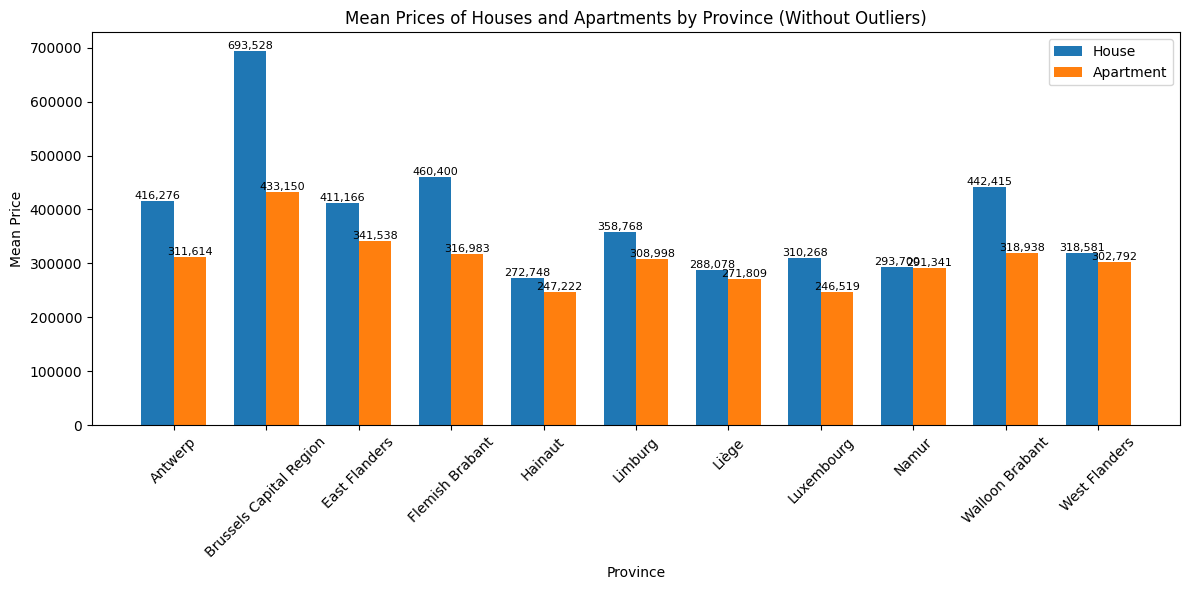

In [23]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Filter only 'house' and 'apartment'
df_filtered = df[df['property_type_name'].isin(['house', 'apartment'])][['province', 'property_type_name', 'price']]

# --------------------------
# Remove outliers using IQR per group
# --------------------------
def remove_outliers(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['price'] >= lower) & (group['price'] <= upper)]

df_no_outliers = df_filtered.groupby(['province', 'property_type_name'], group_keys=False).apply(remove_outliers)

# --------------------------
# Compute mean price per province and property type
# --------------------------
mean_prices = df_no_outliers.groupby(['province', 'property_type_name'])['price'].mean().unstack()

# --------------------------
# Plot grouped bar chart
# --------------------------
labels = mean_prices.index
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))

bars1 = ax.bar(x - width/2, mean_prices['house'], width, label='House')
bars2 = ax.bar(x + width/2, mean_prices['apartment'], width, label='Apartment')

# Add value labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h, f"{h:,.0f}", ha='center', va='bottom', fontsize=8)

ax.set_title("Mean Prices of Houses and Apartments by Province (Without Outliers)")
ax.set_xlabel("Province")
ax.set_ylabel("Mean Price")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


C:\Users\HamidehBaggali\AppData\Local\Temp\ipykernel_21152\2712839626.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_no_outliers = df_filtered.groupby(['province', 'property_type_name'], group_keys=False).apply(remove_outliers)


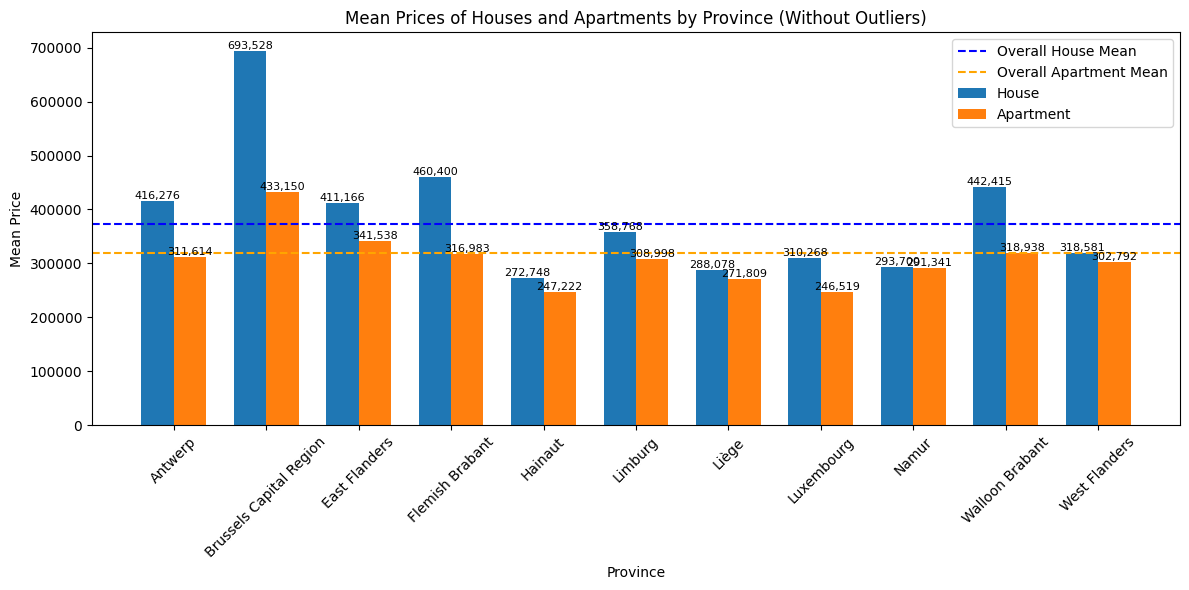

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Filter only 'house' and 'apartment'
df_filtered = df[df['property_type_name'].isin(['house', 'apartment'])][['province', 'property_type_name', 'price']]

# Remove outliers using IQR per group
def remove_outliers(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['price'] >= lower) & (group['price'] <= upper)]

df_no_outliers = df_filtered.groupby(['province', 'property_type_name'], group_keys=False).apply(remove_outliers)

# Compute mean price per province and property type
mean_prices = df_no_outliers.groupby(['province', 'property_type_name'])['price'].mean().unstack()

# Overall mean price for houses and apartments (all provinces)
overall_mean_house = df_no_outliers[df_no_outliers['property_type_name']=='house']['price'].mean()
overall_mean_apartment = df_no_outliers[df_no_outliers['property_type_name']=='apartment']['price'].mean()

# Plot grouped bar chart
labels = mean_prices.index
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))

bars1 = ax.bar(x - width/2, mean_prices['house'], width, label='House')
bars2 = ax.bar(x + width/2, mean_prices['apartment'], width, label='Apartment')

# Add value labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h, f"{h:,.0f}", ha='center', va='bottom', fontsize=8)

# Add horizontal lines for overall means
ax.axhline(overall_mean_house, color='blue', linestyle='--', linewidth=1.5, label=f'Overall House Mean')
ax.axhline(overall_mean_apartment, color='orange', linestyle='--', linewidth=1.5, label=f'Overall Apartment Mean')

ax.set_title("Mean Prices of Houses and Apartments by Province (Without Outliers)")
ax.set_xlabel("Province")
ax.set_ylabel("Mean Price")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


### the above chart for median

C:\Users\HamidehBaggali\AppData\Local\Temp\ipykernel_21152\3862928580.py:20: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



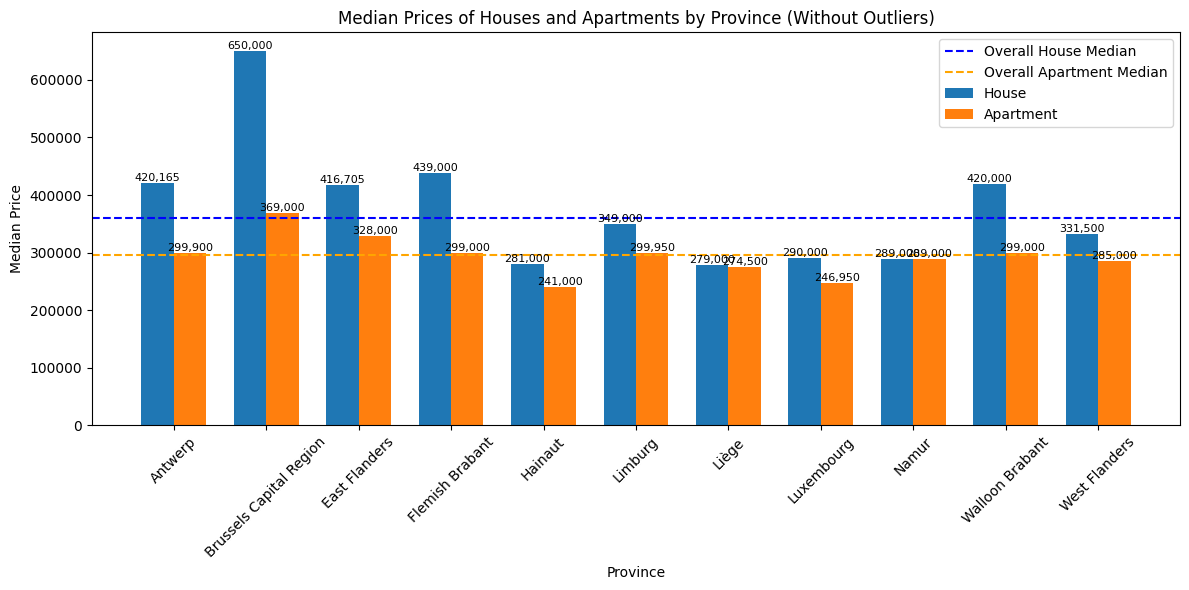

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Filter only 'house' and 'apartment'
df_filtered = df[df['property_type_name'].isin(['house', 'apartment'])][['province', 'property_type_name', 'price']]

# Remove outliers using IQR per group
def remove_outliers(group):
    Q1 = group['price'].quantile(0.25)
    Q3 = group['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['price'] >= lower) & (group['price'] <= upper)]

df_no_outliers = df_filtered.groupby(['province', 'property_type_name'], group_keys=False).apply(remove_outliers)

# Compute median price per province and property type
median_prices = df_no_outliers.groupby(['province', 'property_type_name'])['price'].median().unstack()

# Overall median price for houses and apartments (all provinces)
overall_median_house = df_no_outliers[df_no_outliers['property_type_name']=='house']['price'].median()
overall_median_apartment = df_no_outliers[df_no_outliers['property_type_name']=='apartment']['price'].median()

# Plot grouped bar chart
labels = median_prices.index
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))

bars1 = ax.bar(x - width/2, median_prices['house'], width, label='House')
bars2 = ax.bar(x + width/2, median_prices['apartment'], width, label='Apartment')

# Add value labels on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h, f"{h:,.0f}", ha='center', va='bottom', fontsize=8)

# Add horizontal lines for overall medians
ax.axhline(overall_median_house, color='blue', linestyle='--', linewidth=1.5, label=f'Overall House Median')
ax.axhline(overall_median_apartment, color='orange', linestyle='--', linewidth=1.5, label=f'Overall Apartment Median')

ax.set_title("Median Prices of Houses and Apartments by Province (Without Outliers)")
ax.set_xlabel("Province")
ax.set_ylabel("Median Price")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


### number_room and living_area on price (median)

C:\Users\HamidehBaggali\AppData\Local\Temp\ipykernel_21152\2797174493.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_prices = df_no_outliers.groupby('living_area_bin')['price'].mean().reset_index()


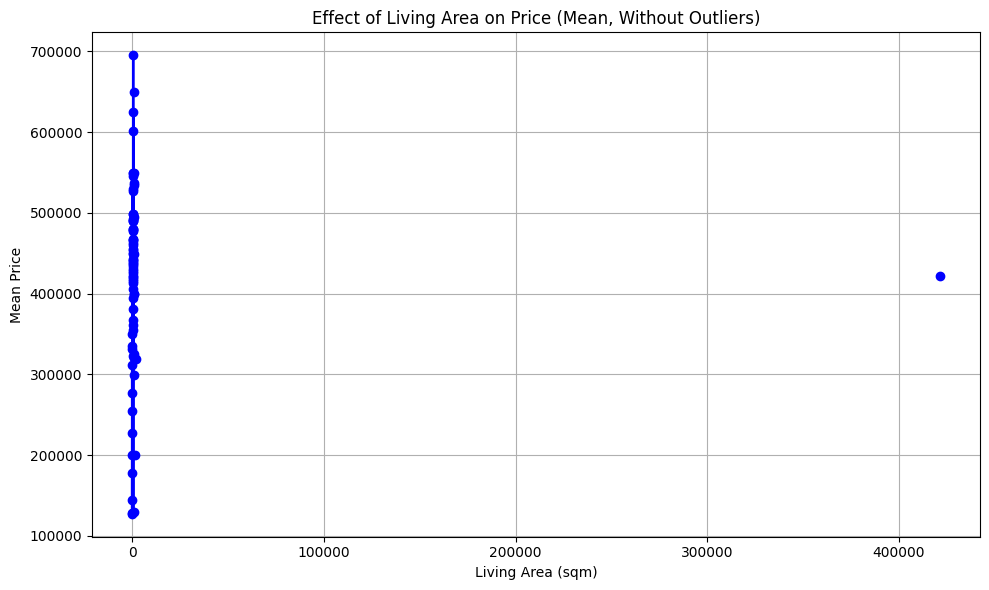

In [31]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Convert to numeric
df['living_area'] = pd.to_numeric(df['living_area'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['living_area', 'price'])

# Remove outliers using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)].copy()

# Bin living_area based on actual min/max
min_area = int(df_no_outliers['living_area'].min() // 10 * 10)
max_area = int(df_no_outliers['living_area'].max() // 10 * 10 + 10)
bins = np.arange(min_area, max_area + 10, 10)
df_no_outliers['living_area_bin'] = pd.cut(df_no_outliers['living_area'], bins)

# Compute mean price per bin
mean_prices = df_no_outliers.groupby('living_area_bin')['price'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
x = mean_prices['living_area_bin'].apply(lambda b: b.mid)
y = mean_prices['price']
plt.plot(x, y, marker='o', color='blue', linewidth=2)
plt.title("Effect of Living Area on Price (Mean, Without Outliers)")
plt.xlabel("Living Area (sqm)")
plt.ylabel("Mean Price")
plt.grid(True)
plt.tight_layout()
plt.show()


### number of rooms

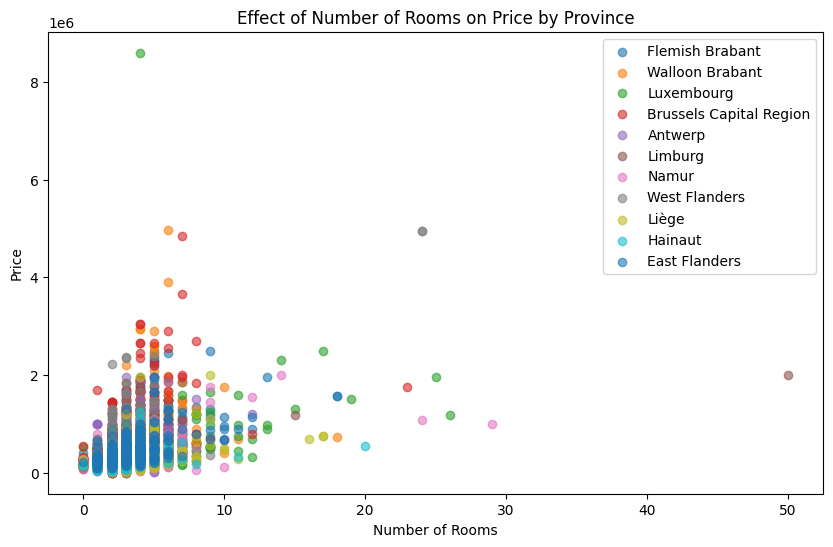

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Ensure numeric columns
df['number_rooms'] = pd.to_numeric(df['number_rooms'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows where number_rooms or price is NaN
df = df.dropna(subset=['number_rooms', 'price', 'province'])

# Ensure province is string
df['province'] = df['province'].astype(str)

# Scatter plot
plt.figure(figsize=(10, 6))
provinces = df['province'].unique()

for province in provinces:
    subset = df[df['province'] == province]
    plt.scatter(subset['number_rooms'], subset['price'], label=province, alpha=0.6)

plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Effect of Number of Rooms on Price by Province')
plt.legend()
plt.show()


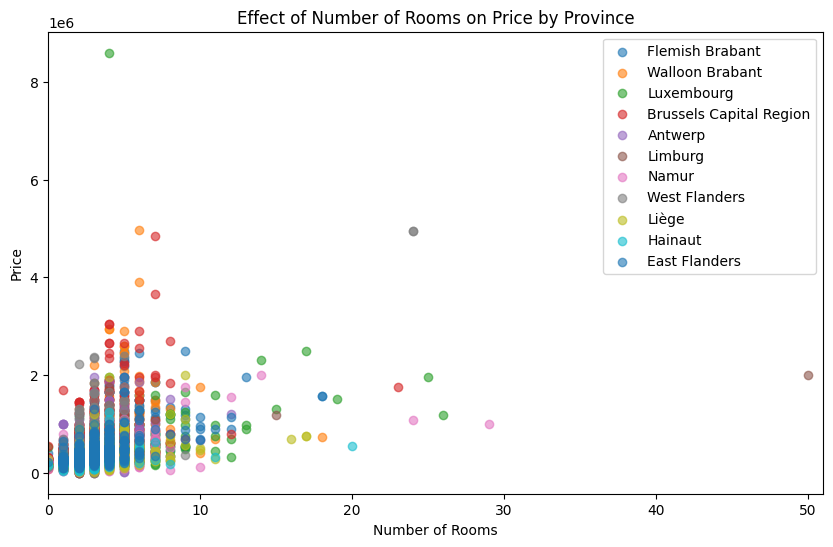

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Ensure numeric columns and convert to integers
df['number_rooms'] = pd.to_numeric(df['number_rooms'], errors='coerce').astype('Int64')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows where number_rooms or price is NaN
df = df.dropna(subset=['number_rooms', 'price', 'province'])

# Ensure province is string
df['province'] = df['province'].astype(str)

# Scatter plot
plt.figure(figsize=(10, 6))
provinces = df['province'].unique()

for province in provinces:
    subset = df[df['province'] == province]
    plt.scatter(subset['number_rooms'], subset['price'], label=province, alpha=0.6)

plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Effect of Number of Rooms on Price by Province')
plt.legend()

# Optionally, set x-axis limit higher if needed
plt.xlim(0, df['number_rooms'].max() + 1)

plt.show()


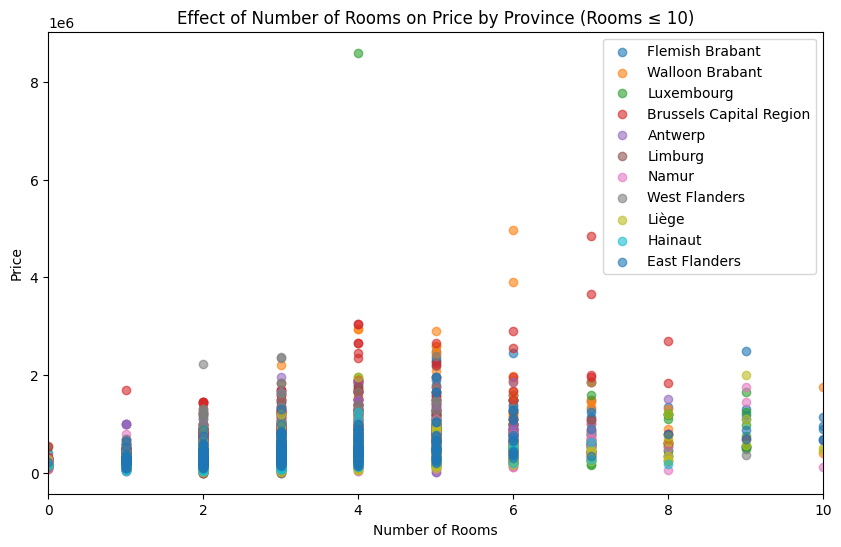

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Ensure numeric columns
df['number_rooms'] = pd.to_numeric(df['number_rooms'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['number_rooms', 'price', 'province'])

# Filter to only include rooms <= 10
df = df[df['number_rooms'] <= 10]

# Ensure province is string
df['province'] = df['province'].astype(str)

# Scatter plot
plt.figure(figsize=(10, 6))
provinces = df['province'].unique()

for province in provinces:
    subset = df[df['province'] == province]
    plt.scatter(subset['number_rooms'], subset['price'], label=province, alpha=0.6)

plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Effect of Number of Rooms on Price by Province (Rooms ≤ 10)')
plt.legend()
plt.xlim(0, 10)  # x-axis limit

plt.show()


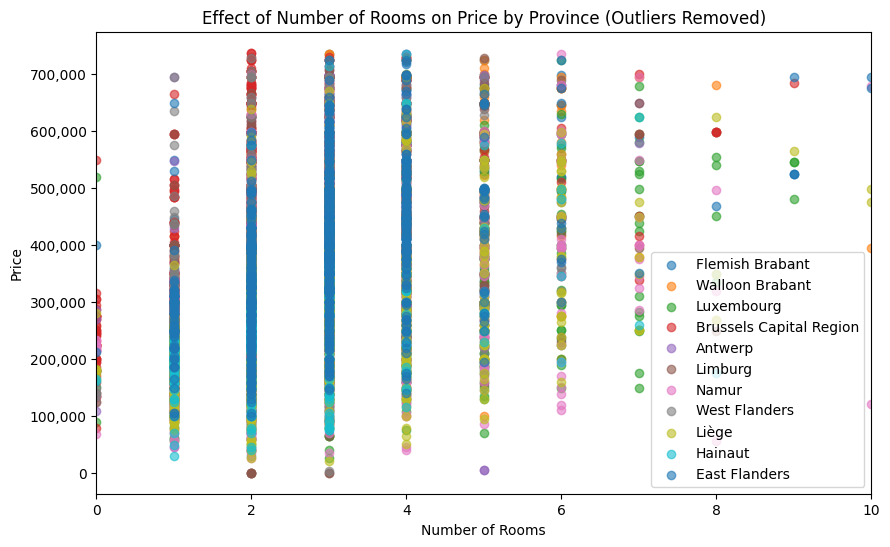

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load CSV
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Clean price column
df['price'] = df['price'].astype(str).str.replace(',', '').str.replace(' ', '')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Ensure number_rooms is numeric
df['number_rooms'] = pd.to_numeric(df['number_rooms'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['number_rooms', 'price', 'province'])

# Optional: limit rooms to 10
df = df[df['number_rooms'] <= 10]

# Remove outliers in price using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Scatter plot
plt.figure(figsize=(10, 6))
for province in df_filtered['province'].unique():
    subset = df_filtered[df_filtered['province'] == province]
    plt.scatter(subset['number_rooms'], subset['price'], label=province, alpha=0.6)

plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Effect of Number of Rooms on Price by Province (Outliers Removed)')
plt.legend()
plt.xlim(0, 10)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

plt.show()


### box plot

C:\Users\HamidehBaggali\AppData\Local\Temp\ipykernel_21152\2632241907.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(room_groups, labels=sorted(df['number_rooms'].unique()))


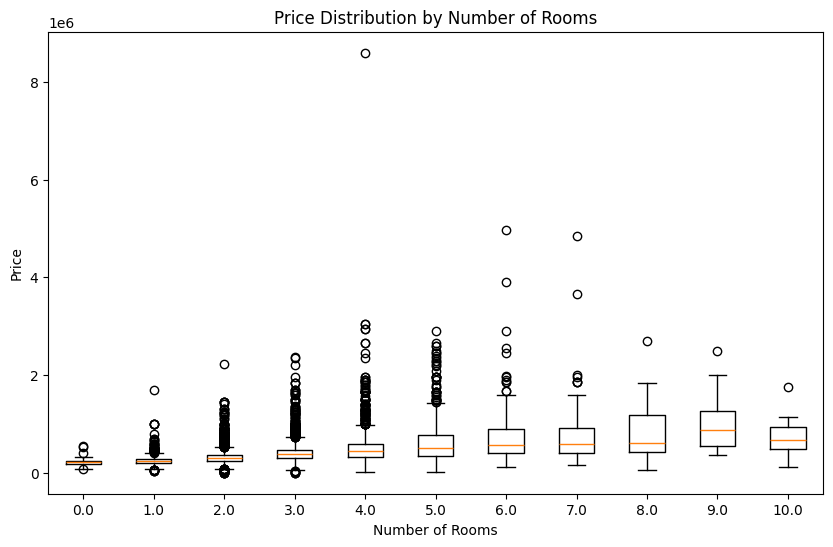

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Ensure numeric columns
df['number_rooms'] = pd.to_numeric(df['number_rooms'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['number_rooms', 'price'])

# Optional: limit number of rooms to 10
df = df[df['number_rooms'] <= 10]

# Prepare data for box plot: list of price values for each number of rooms
room_groups = [df[df['number_rooms'] == r]['price'] for r in sorted(df['number_rooms'].unique())]

plt.figure(figsize=(10, 6))
plt.boxplot(room_groups, labels=sorted(df['number_rooms'].unique()))
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Rooms')
plt.show()


C:\Users\HamidehBaggali\AppData\Local\Temp\ipykernel_21152\432913060.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(room_groups, labels=sorted(df['number_rooms'].unique()), showfliers=False)


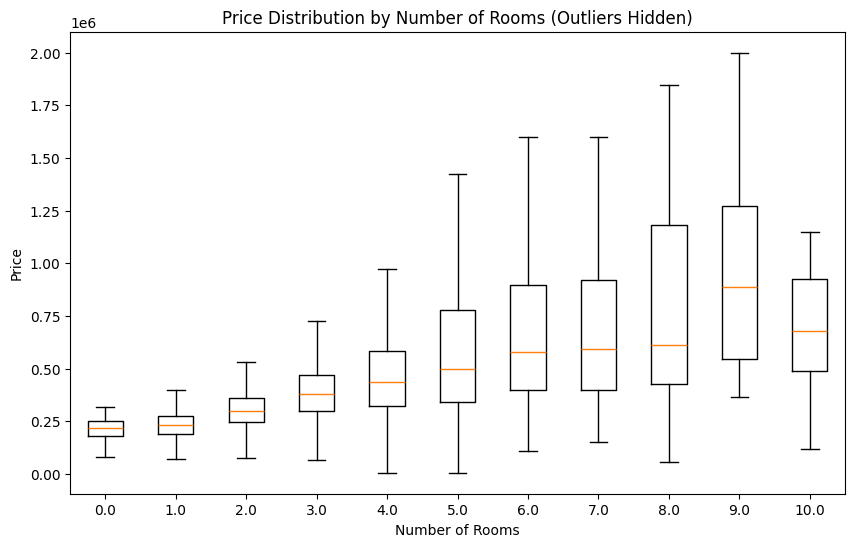

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Ensure numeric columns
df['number_rooms'] = pd.to_numeric(df['number_rooms'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['number_rooms', 'price'])

# Optional: limit number of rooms to 10
df = df[df['number_rooms'] <= 10]

# Prepare data for box plot: list of price values for each number of rooms
room_groups = [df[df['number_rooms'] == r]['price'] for r in sorted(df['number_rooms'].unique())]

plt.figure(figsize=(10, 6))
plt.boxplot(room_groups, labels=sorted(df['number_rooms'].unique()), showfliers=False)
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Rooms (Outliers Hidden)')
plt.show()


C:\Users\HamidehBaggali\AppData\Local\Temp\ipykernel_21152\1007226502.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(room_groups, labels=sorted(df['number_rooms'].unique()), showfliers=False)


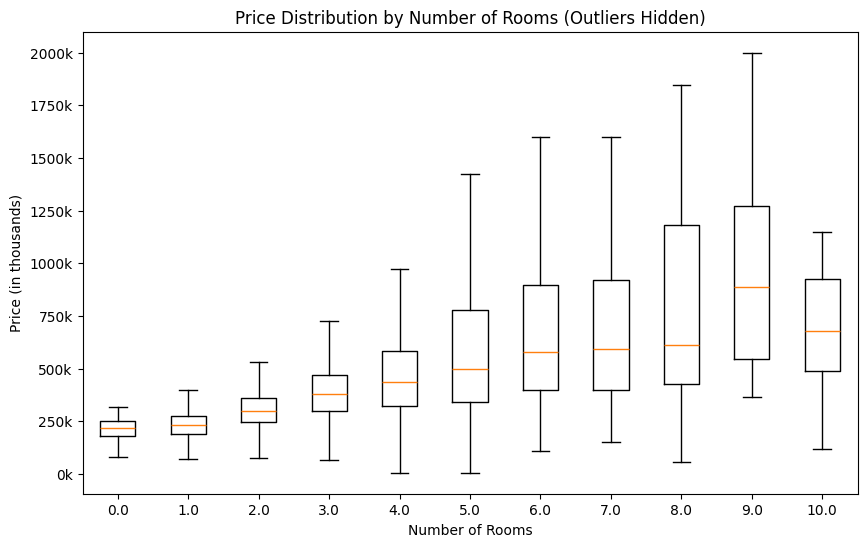

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load CSV
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Ensure numeric columns
df['number_rooms'] = pd.to_numeric(df['number_rooms'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['number_rooms', 'price'])

# Optional: limit number of rooms to 10
df = df[df['number_rooms'] <= 10]

# Prepare data for box plot: list of price values for each number of rooms
room_groups = [df[df['number_rooms'] == r]['price'] for r in sorted(df['number_rooms'].unique())]

plt.figure(figsize=(10, 6))
plt.boxplot(room_groups, labels=sorted(df['number_rooms'].unique()), showfliers=False)

plt.xlabel('Number of Rooms')
plt.ylabel('Price (in thousands)')
plt.title('Price Distribution by Number of Rooms (Outliers Hidden)')

# Format y-axis in thousands
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.show()


C:\Users\HamidehBaggali\AppData\Local\Temp\ipykernel_21152\2859714498.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(room_groups, labels=room_numbers, showfliers=False, patch_artist=True)


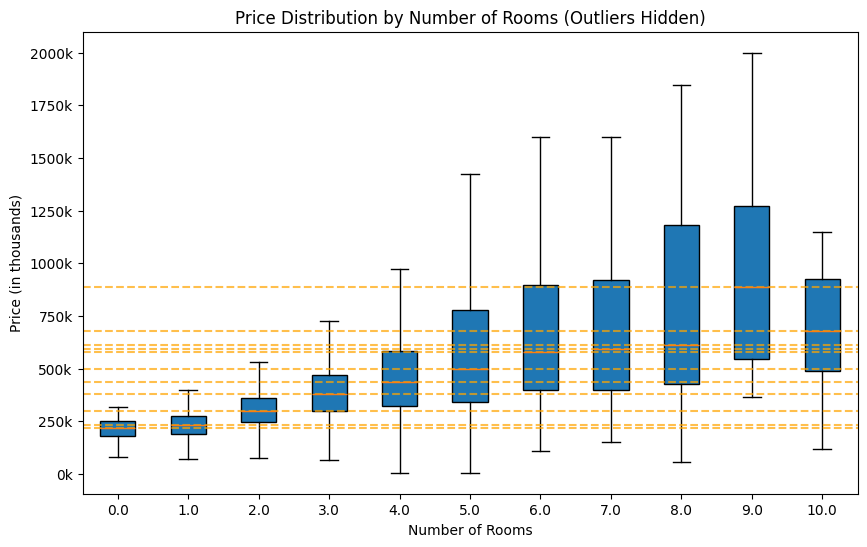

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load CSV
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Ensure numeric columns
df['number_rooms'] = pd.to_numeric(df['number_rooms'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['number_rooms', 'price'])

# Optional: limit number of rooms to 10
df = df[df['number_rooms'] <= 10]

# Prepare data for box plot
room_numbers = sorted(df['number_rooms'].unique())
room_groups = [df[df['number_rooms'] == r]['price'] for r in room_numbers]

plt.figure(figsize=(10, 6))
box = plt.boxplot(room_groups, labels=room_numbers, showfliers=False, patch_artist=True)

plt.xlabel('Number of Rooms')
plt.ylabel('Price (in thousands)')
plt.title('Price Distribution by Number of Rooms (Outliers Hidden)')

# Format y-axis in thousands
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

# Extend median line across the plot
for median in box['medians']:
    y = median.get_ydata()[0]  # y-value of median
    plt.hlines(y, xmin=0.5, xmax=len(room_numbers)+0.5, colors='orange', linestyles='--', alpha=0.7)

plt.show()


In [57]:

import pandas as pd
import plotly.express as px

# Load CSV
df = pd.read_csv("Hamideh_final_data_cleaned.csv")

# Ensure numeric columns
df['number_rooms'] = pd.to_numeric(df['number_rooms'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['number_rooms', 'price'])

# Limit number of rooms to 10
df = df[df['number_rooms'] <= 10]

# Interactive box plot
fig = px.box(
    df,
    x='number_rooms',
    y='price',
    points=False,   # hide outliers if you want
    labels={'number_rooms': 'Number of Rooms', 'price': 'Price'},
    title='Price Distribution by Number of Rooms (Outliers Hidden)'
)

# Format y-axis in thousands
fig.update_yaxes(tickformat=',.0f', title_text='Price (in thousands)')

# Show in browser if notebook support is missing
fig.show(renderer="browser")
